# 词向量
https://blog.csdn.net/Yellow_python/article/details/84347878

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')  # 不打印警告
from jieba import lcut
from gensim.models import Word2Vec

with open('data.txt', encoding='utf-8') as f:
    sentences = [lcut(s) for s in f.readlines()]
model = Word2Vec(sentences, window=10)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\ADMINI~1\AppData\Local\Temp\1\jieba.cache
Loading model cost 1.132 seconds.
Prefix dict has been built succesfully.


In [2]:
model.wv.similar_by_word('身份证', topn=4)

[('证件', 0.9155412912368774),
 ('准考证', 0.9093627333641052),
 ('原件', 0.8911137580871582),
 ('书面材料', 0.8759361505508423)]

In [3]:
model.wv.similarity('身份证', '准考证')

0.9093627

In [4]:
vec = model.wv.get_vector('身份证')
vec.shape

(100,)

In [5]:
model.wv.similar_by_vector(vec, 3)

[('身份证', 1.0), ('证件', 0.9155412912368774), ('准考证', 0.9093626737594604)]

In [6]:
model.wv.vectors.shape

(67490, 100)

In [7]:
model.wv.index2word.__len__()

67490

In [8]:
model.predict_output_word(['身份证', '准考证'])

[('身份证', 0.06272127),
 ('准考证', 0.054813985),
 ('附件', 0.017388288),
 ('填写', 0.012229511),
 ('查询', 0.010383278),
 ('报名费', 0.010134449),
 ('证件', 0.009735247),
 ('报名表', 0.009292464),
 ('办理', 0.00911228),
 ('用户名', 0.008987774)]

## 词向量可视化

### 词向量可解释性：
`低`

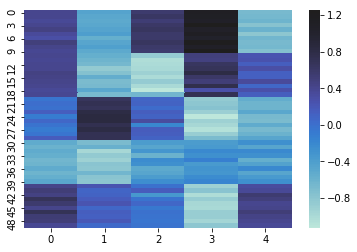

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')  # 不打印警告
%matplotlib inline
from gensim.models import Word2Vec
from seaborn import heatmap

n, m = 10, 1000
sentences = [
    ''.join(chr(i) for i in range(40, 50)) * n,
    ''.join(chr(i) for i in range(50, 60)) * n,
    ''.join(chr(i) for i in range(60, 70)) * n,
    ''.join(chr(i) for i in range(70, 80)) * n,
    ''.join(chr(i) for i in range(80, 90)) * n,
] * n * m
model = Word2Vec(sentences, size=5, window=15, hs=1, sorted_vocab=0, cbow_mean=0)
vectors = model.wv.vectors

heatmap(vectors, center=vectors.max())

# 字向量

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')  # 不打印警告
import numpy as np
from jieba import lcut
from gensim.models import Word2Vec

def chr2vec(word2vec=False):
    with open('data.txt', encoding='utf-8') as f:
        sentences = [lcut(s) for s in f.readlines()] if word2vec else f.readlines()
    return Word2Vec(sentences, window=10, min_count=2)

w2v = chr2vec(word2vec=True)  # 词向量
c2v = chr2vec()  # 字向量

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\ADMINI~1\AppData\Local\Temp\1\jieba.cache
Loading model cost 1.253 seconds.
Prefix dict has been built succesfully.


### 字向量和词向量嘅关系：
`冇乜卵关系`

In [2]:
get_vector = lambda model, word: model.wv.word_vec(word)
cosine_similarity = lambda vec1, vec2: vec1 @ vec2 / (np.linalg.norm(vec1) * np.linalg.norm(vec2))

for _ in range(4):
    word = input('输入词语：').strip()
    v1 = get_vector(w2v, word)
    v2 = np.sum([get_vector(c2v, c) for c in word], axis=0)
    print('余弦相似度（字向量相加）', cosine_similarity(v1, v2))
    v2 = np.mean([get_vector(c2v, c) for c in word], axis=0)
    print('余弦相似度（字向量平均）', cosine_similarity(v1, v2))
    print(w2v.similar_by_word(word, topn=4))

输入词语：电动车
余弦相似度（字向量相加） -0.059150364
余弦相似度（字向量平均） -0.05915035
[('电动汽车', 0.7713425159454346), ('纯', 0.7606891989707947), ('核心技术', 0.6353178024291992), ('燃料电池', 0.6251661777496338)]
输入词语：身份证
余弦相似度（字向量相加） -0.12499108
余弦相似度（字向量平均） -0.124991104
[('证件', 0.9329153299331665), ('准考证', 0.9220209717750549), ('原件', 0.904299259185791), ('填写', 0.8965921401977539)]
输入词语：核心技术
余弦相似度（字向量相加） -0.071450144
余弦相似度（字向量平均） -0.071450144
[('规模化', 0.7545690536499023), ('产业化', 0.712794303894043), ('技术创新', 0.7046120166778564), ('关键技术', 0.702349066734314)]
输入词语：居民
余弦相似度（字向量相加） 0.12795967
余弦相似度（字向量平均） 0.12795967
[('老年人', 0.7776780724525452), ('子女', 0.7423837184906006), ('居住', 0.7091993689537048), ('物资', 0.6898789405822754)]


### 文本生成（现代文）

In [3]:
from random import choice

def text_generate(text, model, length=25, freedom=10):
    seq = lcut(text)
    len_origin = len(seq)
    for i in range(length):
        chrs = model.predict_output_word(seq, max(freedom, len(seq)+1))
        char = choice([i[0] for i in chrs if i[0] not in seq[len_origin:]])
        seq.append(char)
    return ''.join(seq[len_origin:])

for _ in range(4):
    try:
        text = input('输入文本：').strip()
        print('\033[035m词向量模型\033[0m', text_generate(text, w2v), sep='\n')
        print('\033[035m字向量模型\033[0m', text_generate(text, c2v), sep='\n')
    except Exception as e:
        print(e)

输入文本：找女朋友
词向量模型
找回家吃饭上班家里午饭睡觉儿子吃房子出差出门老人喝酒哥哥母亲空饷亲戚老公父亲赶紧女儿送陪某某
字向量模型
要寻想我找需思茬求追渚僮们唧窨你砭孫嗝岘煦叁焯吮楞
输入文本：长眉大眼妆，甜美中透出强大气场
词向量模型
美对抗战役发挥韩激烈比赛一场胜利主场对阵对手争夺客场决赛一战胜出这场较量击败激战战胜复仇小组赛胜负
字向量模型
国韩杯挲洲欧冠铩赛联盟亚夺军锦峒汨砧仝蓁琊擘裾頗靛
输入文本：房地产投资下滑
词向量模型
房地产放缓同比下降下滑一季度增幅增长第三季度三季度收入去年同期增速环比增长率gdp净利润营收利润率持平录得亏损产量利润二季度
'NoneType' object is not iterable
输入文本：宏观经济周期形势变化
词向量模型
态势下状态变化发生背景经济运行形势恶化宏观经济下行分化低迷局势好转复苏剧烈回暖放缓格局严峻天气通缩动荡疲软
'NoneType' object is not iterable
